Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


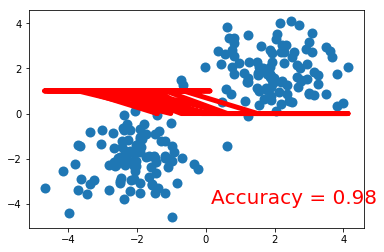

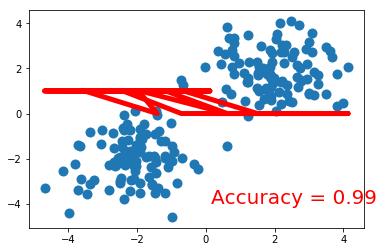

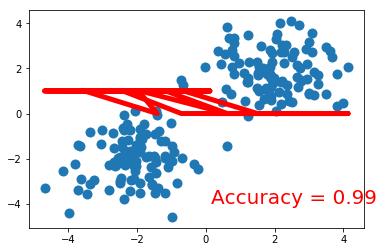

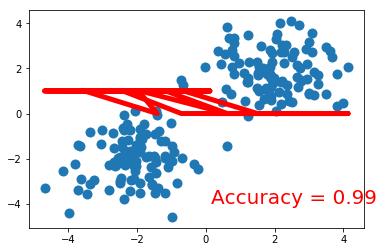

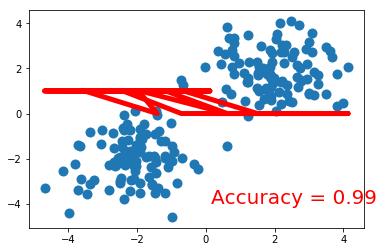

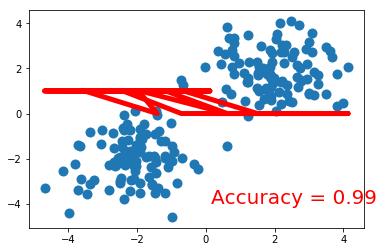

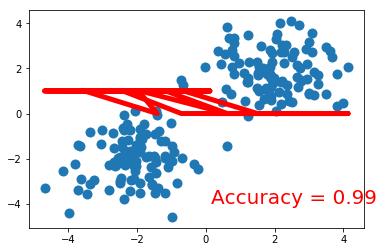

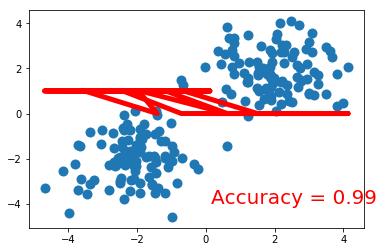

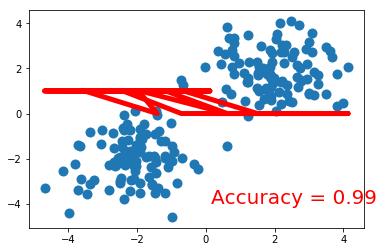

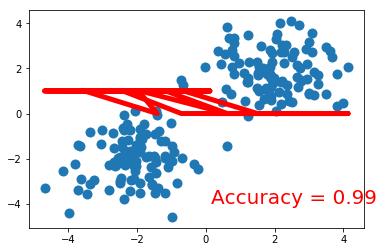

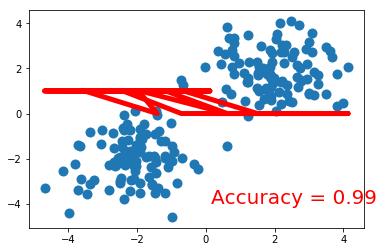

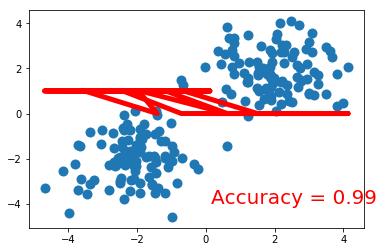

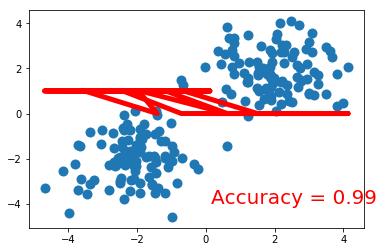

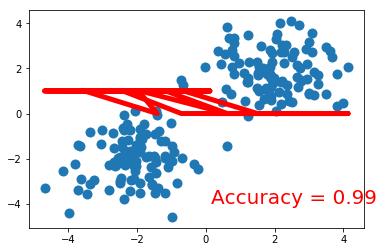

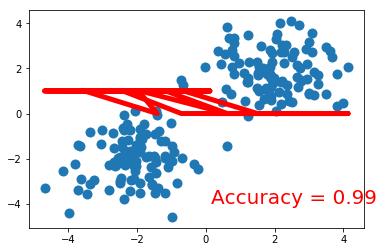

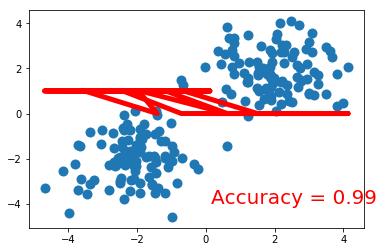

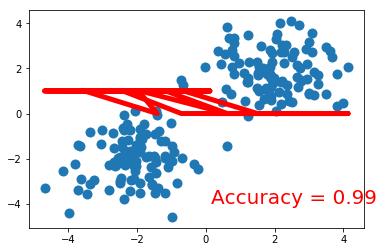

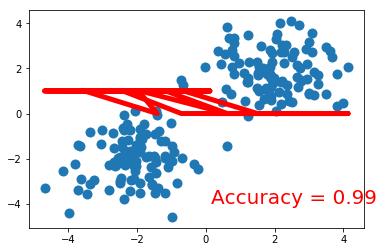

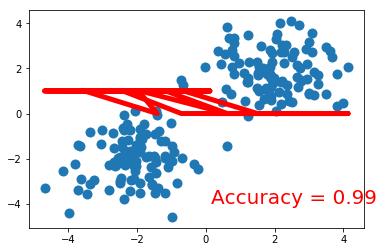

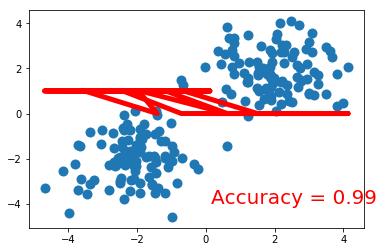

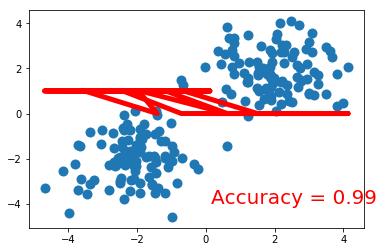

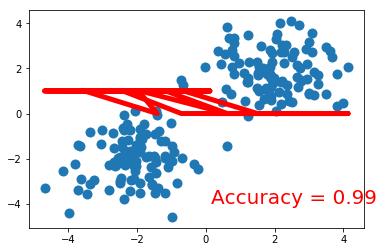

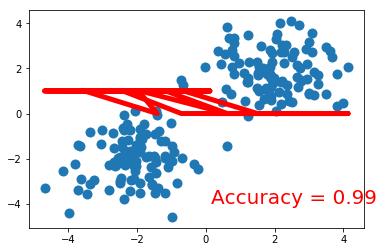

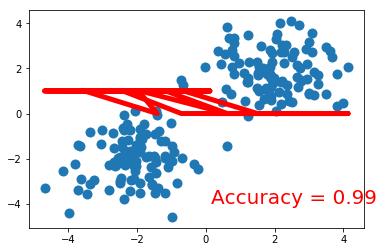

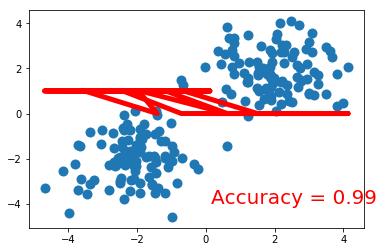

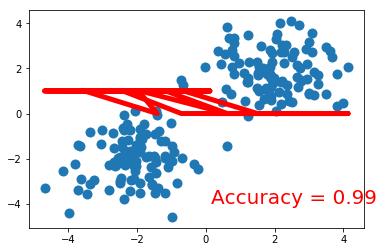

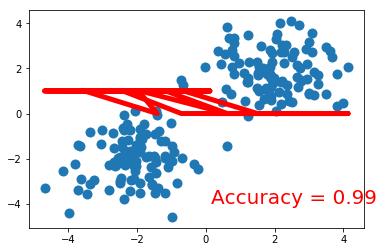

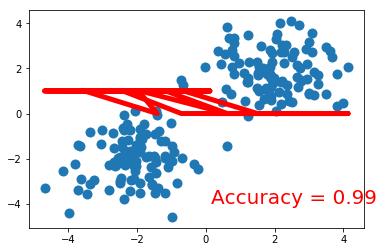

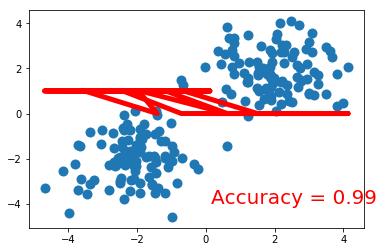

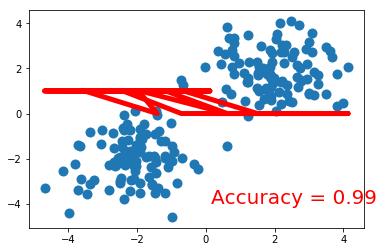

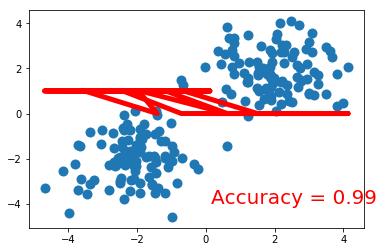

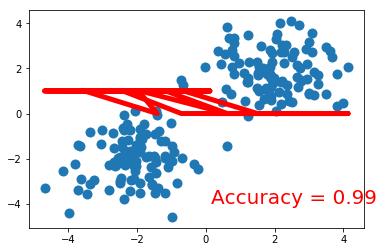

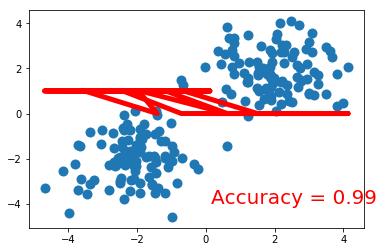

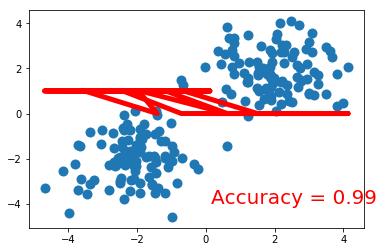

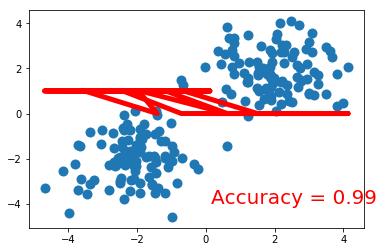

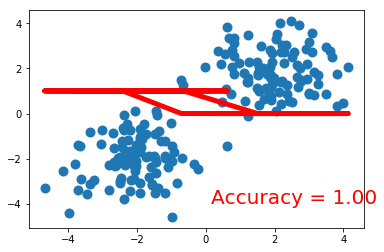

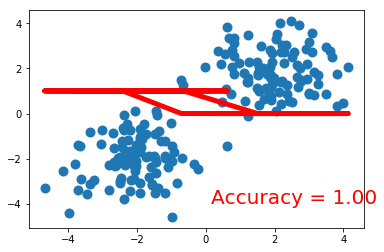

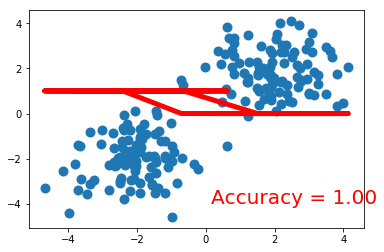

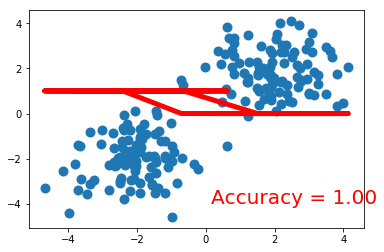

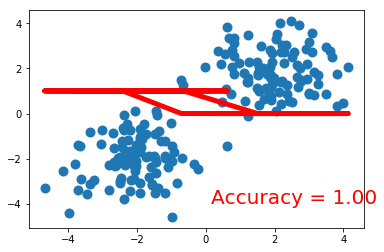

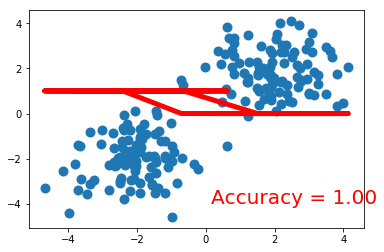

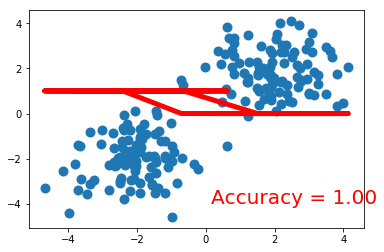

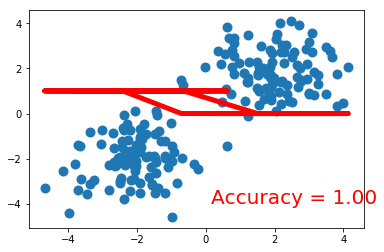

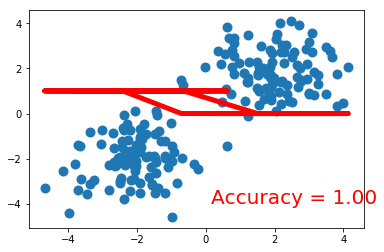

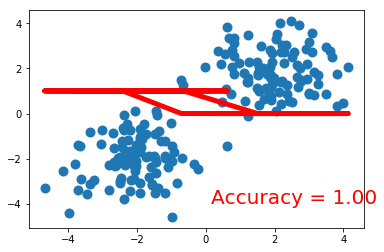

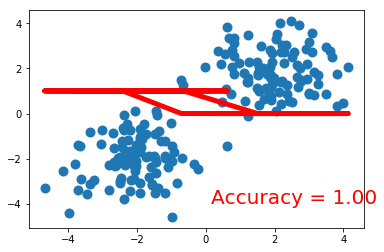

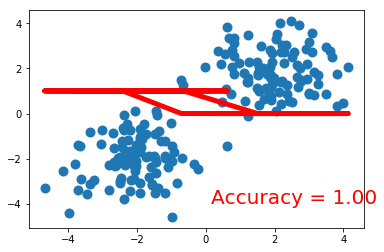

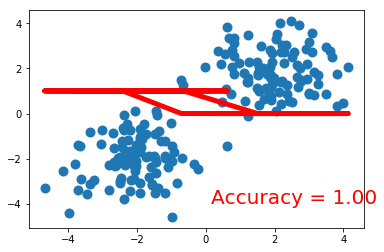

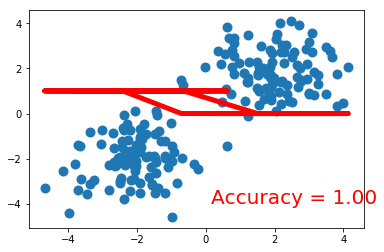

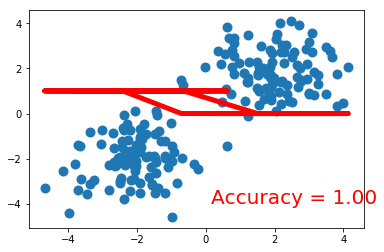

In [21]:
import torch 
import torch.nn.functional as F 
from torch.autograd import Variable
import matplotlib.pyplot as plt

n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)

x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], c =  y.data.numpy(), s = 100, lw = 0, cmap = 'RdYlGn')
# plt.show()

class Net(torch.nn.Module):
  def __init__(self, n_features, n_hidden, n_output):
    super(Net,self). __init__()
    self.hidden = torch.nn.Linear(n_features, n_hidden)
    self.predict = torch.nn.Linear(n_hidden, n_output)
    
  
  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x
  
  net = Net(2, 10, 2)
  print(net)
  
  net2 = torch.Sequential(
  torch.nn.Linear(1,10),
      torch.nn.ReLU(),
      torch.nn.Linear(10,1)
  )
  
  def save():
    net1 =  torch.Sequential(
  torch.nn.Linear(2,10),
      torch.nn.ReLU(),
      torch.nn.Linear(10,2)
        
def restore_net():
        net2 = torch.load('net.pk1')
  
def restore_params():
        net3 = torch.Sequential(
  torch.nn.Linear(1,10),
      torch.nn.ReLU(),
      torch.nn.Linear(10,1)
        )
        
  plt.ion()
  plt.show()
  
  optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)
  loss_func = torch.nn.CrossEntropyLoss()
  
  for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    if t % 2 == 0:
      plt.cla()
      prediction = torch.max(F.softmax(out),1)[1]
      pred_y = prediction.data.numpy().squeeze()
      target_y = y.data.numpy()
      plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s = 100, lw = 0, cmap = 'RdYlGn')
      accuracy = sum(pred_y == target_y)/200
      plt.text(.15,-4,'Accuracy = %.2f' % accuracy, fontdict = {'size':20,'color':'red'})
      plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw = 5)
      plt.pause(0.1)
      
torch.save(net1,'net1.pk1')
torch.save(net1.sate_dict(),'net_parpams.pk1')
      
plt.ioff()
plt.show()


In [24]:
import torch
import torch.utils.data as Data

Batch_size = 5

x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)

torch_dataset = Data.TensorDataset( x, y)
loader = Data.DataLoader(
  dataset = torch_dataset,
batch_size = Batch_size,
shuffle = True,
num_workers = 2,)

for epoch in range(3):
  for step, (batch_x, batch_y) in enumerate(loader):
    print('Epoch:',epoch, '|Step', step, '|batch x:', batch_x.numpy(), '|batch y:' , batch_y.numpy())
    

Epoch: 0 |Step 0 |batch x: [5. 1. 3. 7. 6.] |batch y: [ 6. 10.  8.  4.  5.]
Epoch: 0 |Step 1 |batch x: [ 2. 10.  4.  8.  9.] |batch y: [9. 1. 7. 3. 2.]
Epoch: 1 |Step 0 |batch x: [1. 8. 9. 4. 5.] |batch y: [10.  3.  2.  7.  6.]
Epoch: 1 |Step 1 |batch x: [ 2.  3.  6.  7. 10.] |batch y: [9. 8. 5. 4. 1.]
Epoch: 2 |Step 0 |batch x: [5. 8. 6. 3. 4.] |batch y: [6. 3. 5. 8. 7.]
Epoch: 2 |Step 1 |batch x: [10.  9.  7.  1.  2.] |batch y: [ 1.  2.  4. 10.  9.]


In [43]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

EPOCH = 1
BATCH_size = 50 
LR = 0.001
download_mnist = True

train_data  = torchvision.datasets.MNIST(
root = './mnist',
train = True,
transform = torchvision.transforms.ToTensor(),
download = download_mnist, 
)
# print(train_data.train_data.size())
# print(train_data.train_labels.size())
# plt.imshow(train_data.train_data[0].numpy(), cmap = 'gray')
# plt.title('%i' % train_data.train_labels[0])
# plt.show()

test_data = torchvision.datasets.MNIST(root = './mnist/', train = False)

train_loader = Data.DataLoader(dataset = train_data, batch_size = BATCH_size, shuffle = True )

test_x = torch.unsqueeze(test_data.test_data, dim = 1).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels[:2000]

class CNN(nn.Module):
  def __ini__(self):
    super(CNN, self). __init__()
    self.conv1 = nn.Sequential(
    nn.Conv2d(
    in_channels = 1,
        out_channels = 16, 
        kernel_size = 5,
        stride = 1,
        padding = 2,
    ),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2),
    )
    self.conv2 = nn.Sequential(
    nn.Conv2d(16,32,5,1,2,),
    nn.ReLU(),
    nn.MaxPool2d(2),
    )
    
    self.out = nn.linear(32*7*7,10)
    
def forward(self, x):
  x = self.conv1(x)
  x = self.conv2(x)
  x = x.view(x.size(0), -1)
  output = self.out(x)
  return output
   
  
cnn = CNN()  
  
  
optimizer = torch.optim.Adam(cnn.parameters(), lr = LR)
loss_func = nn.CrossEntropyLoss()

for epoch in range(EPOCH):
  for step, (b_x, b_y) in enumerate(train_loader):
    output = cnn(b_x)
    loss = loss_func(output, b_y)
    optimizer.zero_grad()
    loss.backward()
    optimize.step()
    

test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


ValueError: ignored